In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Surjit Singh Kadian\Desktop\WA_Fn-UseC_ -HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

Total 1470 rows and 35 columns are present in dataset

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Oberservation:
    
In the Data Set we have all the type of data i.e, General, Professional, Personal

Attrition is our Label column

In [5]:
# Checking the types of the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are total 35 columns in dataset out of that most of columns are in int data type and few are in object type

In [6]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

# Check for missing data

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

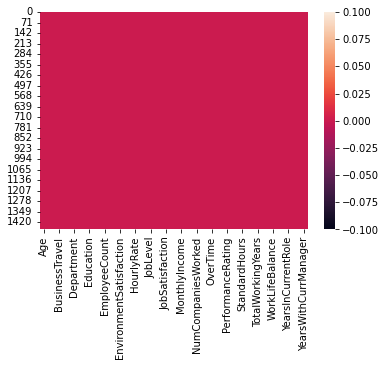

In [8]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

By visualizing also we can see there are no missing values. So our data is cleaned.

# Description of Dataset

In [9]:
# Statistical summary of dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

The counts of all the columns are same which means there are no null values present in the daaset.

Minimum age is 18 and maximum age is 60 years.

Minimum distancefromhome is 1KM and maximum distance is 29KM.

StandardHours is constant as 80.

Difference b/w 'Mean' and 'Std' is more in many columns but in few columns it's very less.

There are some column in 'min' there we have '0' as their value

In [10]:
# data types and unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('--------------------------')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
--------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
--------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
--------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
--------------------------
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
--------------------------
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Tech

In [11]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [12]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [13]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [14]:
df = df.drop('Over18',axis=1)
df = df.drop('StandardHours',axis=1)
df = df.drop('EmployeeCount',axis=1)
df = df.drop('EmployeeNumber',axis=1)

We have to drop above columns as we are not getting much information to data

# Univariate Analysis

# Number of employee overall left or stayed in company

In [15]:
df_count = df['Attrition'].value_counts()
df_count = pd.DataFrame(df_count)
df_count

,Attrition
No,1233
Yes,237


# Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

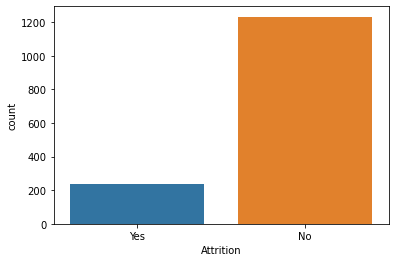

In [16]:
sns.countplot(df['Attrition'])

Out of 1470, 237 employee left and 1233 stayed in company

# Age

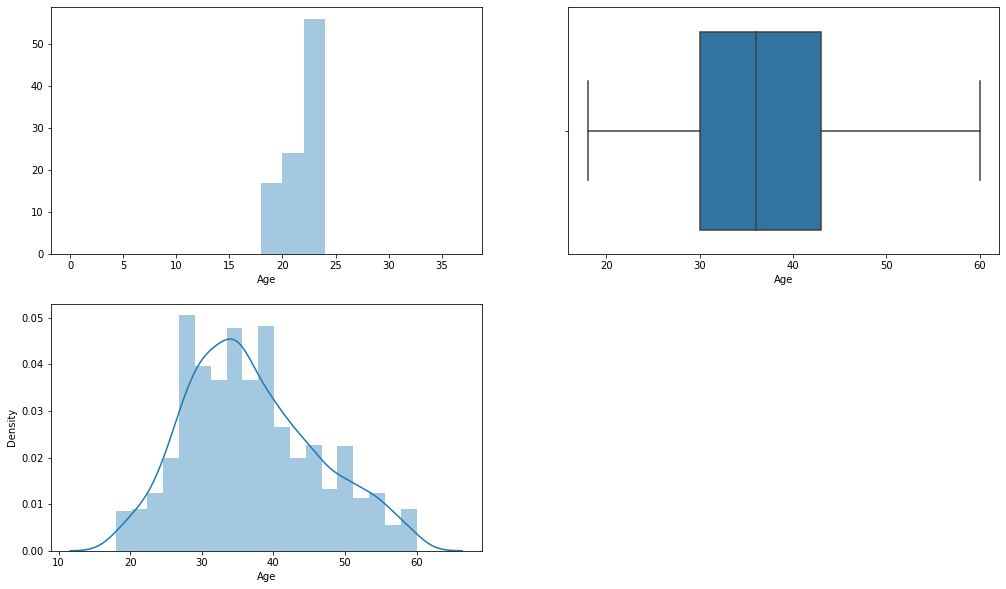

In [17]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.distplot(df['Age'], kde = False, bins=range(0,25,2));
plt.subplot(2,2,2)
sns.boxplot(df['Age']);
plt.subplot(2,2,3)
sns.distplot(df['Age']);

The graph is almost normally distributed and also we can see that there are no outliers detected 

# Businesstravel 

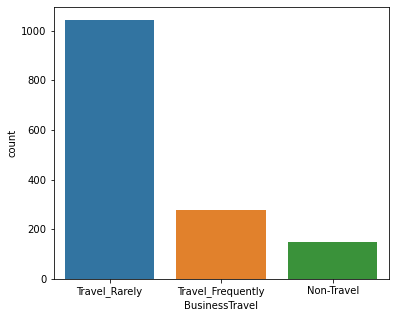

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(df.BusinessTravel);

Here we can see that there are more number of "Travel_Rarely" and then the order is followed by, "Travel frequently Bussiness travel" and then by, "Non-Travel".

# Daily Rate

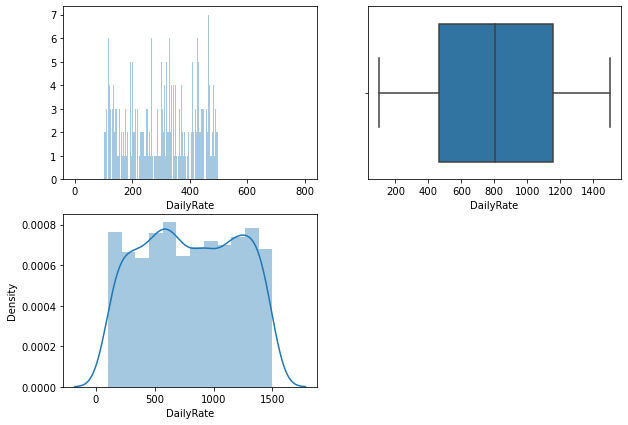

In [19]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df['DailyRate'], kde = False, bins=range(0,500,2));
plt.subplot(2,2,2)
sns.boxplot(df['DailyRate']);
plt.subplot(2,2,3)
sns.distplot(df['DailyRate']);

We can see that the distribution curve is broad and seems to be distributed almsot normally and also we can see that there are no outliers in the boxplot.

# Department

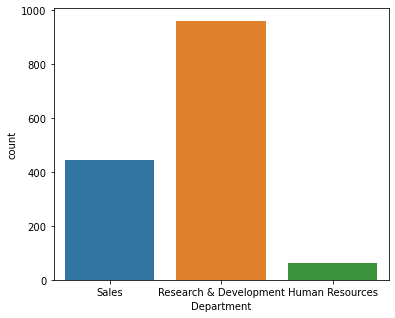

In [20]:
plt.figure(figsize=(6,5))
sns.countplot(df.Department);

We can see that "Research and Development" bar is higher than the other bars and the least one is "Human Resources"

# Distance From Home

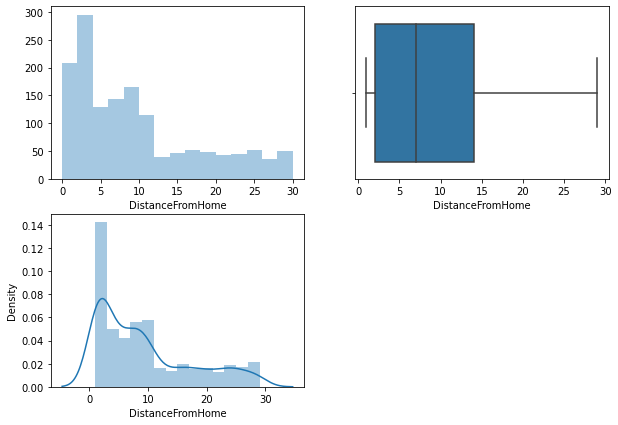

In [21]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df['DistanceFromHome'], kde = False, bins=range(0,31,2));
plt.subplot(2,2,2)
sns.boxplot(df['DistanceFromHome']);
plt.subplot(2,2,3)
sns.distplot(df['DistanceFromHome']);

We can see that there no outliers are present in the boxplot but the distribution curve is not at all normall and it is skewed towards right and so it is right-skewed due to which boxplot is onesided.

# Education

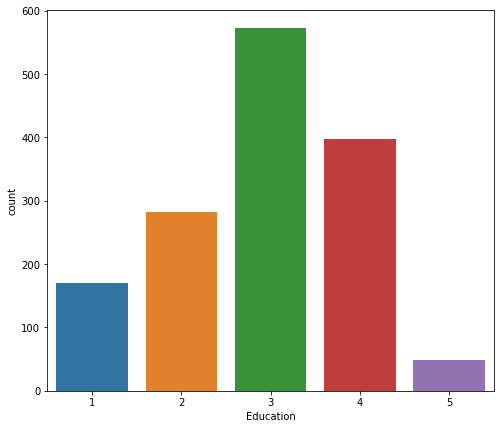

In [22]:
plt.figure(figsize=(8,7))
sns.countplot(df.Education);

We can see that the high count of the education is seen in "Category -3" and the least is seen in "category -5"

# Education Field

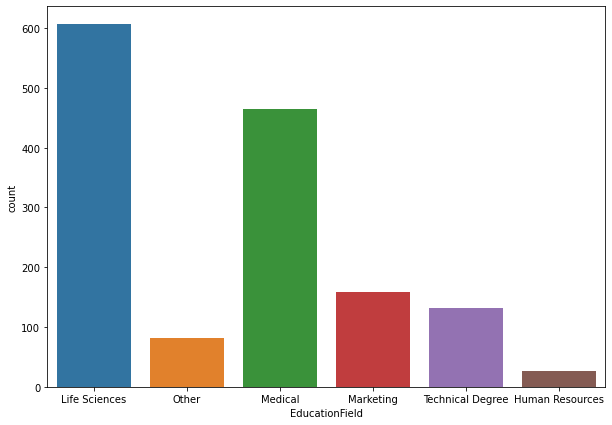

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(df.EducationField);

We can see that there is highest count for the bar "Life sciences" and least one is "Human Resources"

# EnvironmentSatisfaction

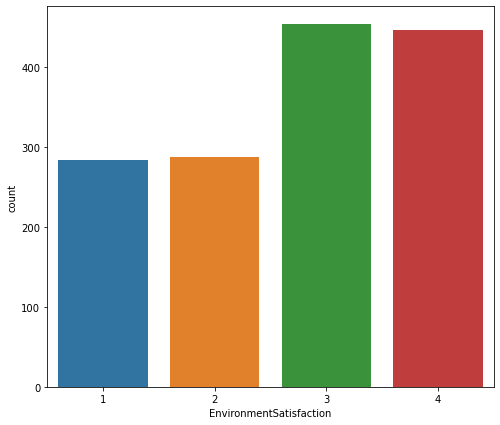

In [24]:
plt.figure(figsize=(8,7))
sns.countplot(df.EnvironmentSatisfaction);

We can see that there is high count in the "category - 3" and also we can see that category 3 & 4 are almost same.

# Gender

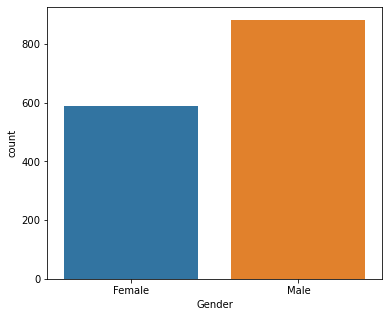

In [25]:
plt.figure(figsize=(6,5))
sns.countplot(df.Gender);

We can see that the high count is for "male" category than "Female"

# HourlyRate

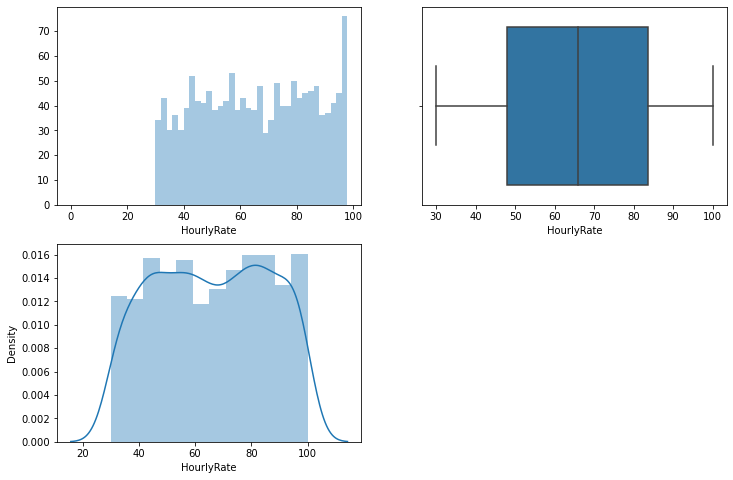

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['HourlyRate'], kde=False, bins=range(0, 100, 2));
plt.subplot(2,2,2)
sns.boxplot(df['HourlyRate']);
plt.subplot(2,2,3)
sns.distplot(df['HourlyRate']);

We can see that there are no outliers can be in the boxplot and the distribution curve is almost "normal".

# Job Involvement

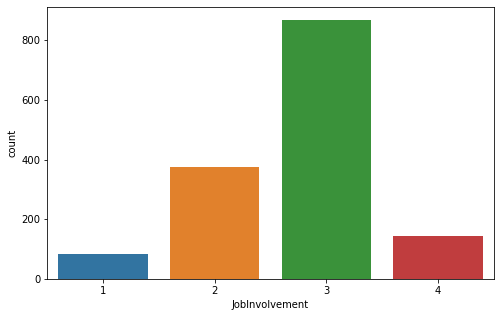

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df.JobInvolvement);

We can see that the highest count can be seen in "Category - 3" and least in "category - 1"

# JobLevel

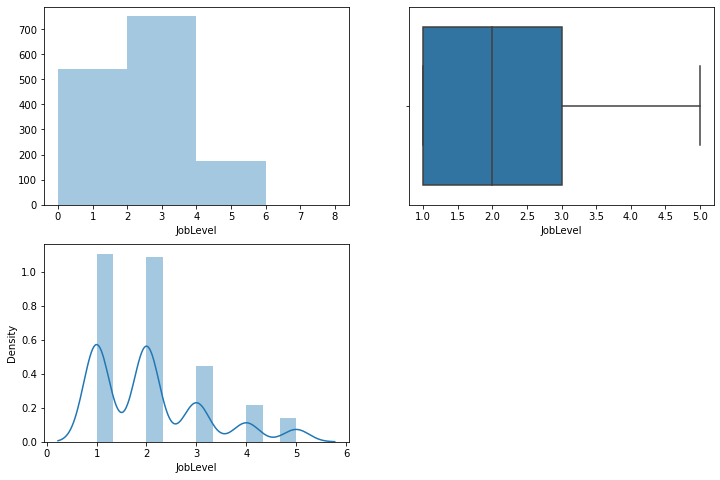

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['JobLevel'], kde=False, bins=range(0, 10, 2));
plt.subplot(2,2,2)
sns.boxplot(df['JobLevel']);
plt.subplot(2,2,3)
sns.distplot(df['JobLevel']);

We can see that there no outliers in the boxplot but also it is onesided and the distribution is not at all normal

# JobRole

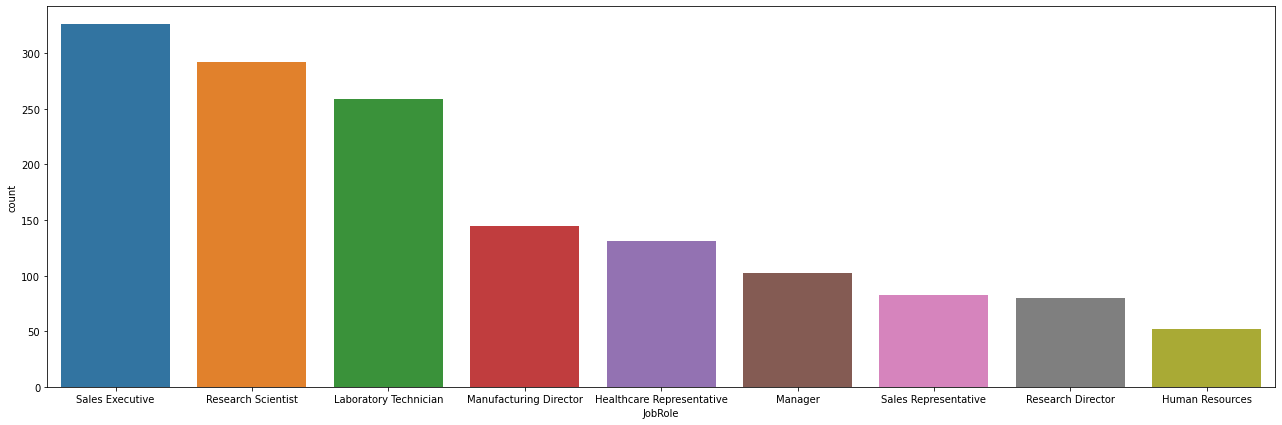

In [32]:
plt.figure(figsize=(22,7))
sns.countplot(df.JobRole);

We can see that the high count is for the category "Sales Executive" and the least is for the "Human Resources"

# JobSatisfaction

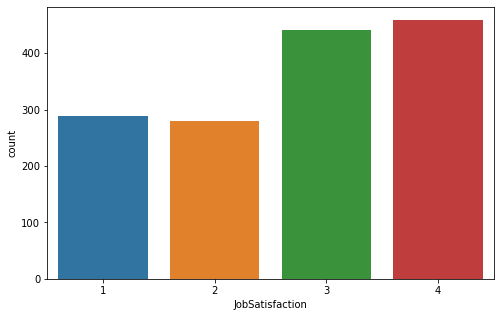

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df.JobSatisfaction);

we can see that there are is similar to the "environment satisfaction" column and the category 3 & 4 are almost similar in their count and the least one is "category 2".

# MaritalStatus

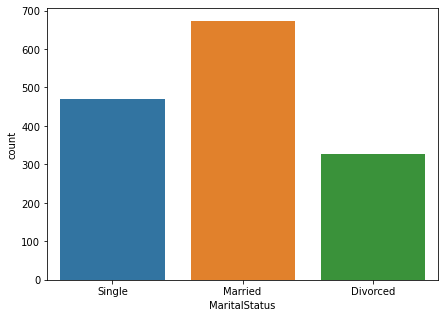

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(df.MaritalStatus);

We can see that there are more number of employees who are married and the least one are divorced.

# MonthlyIncome

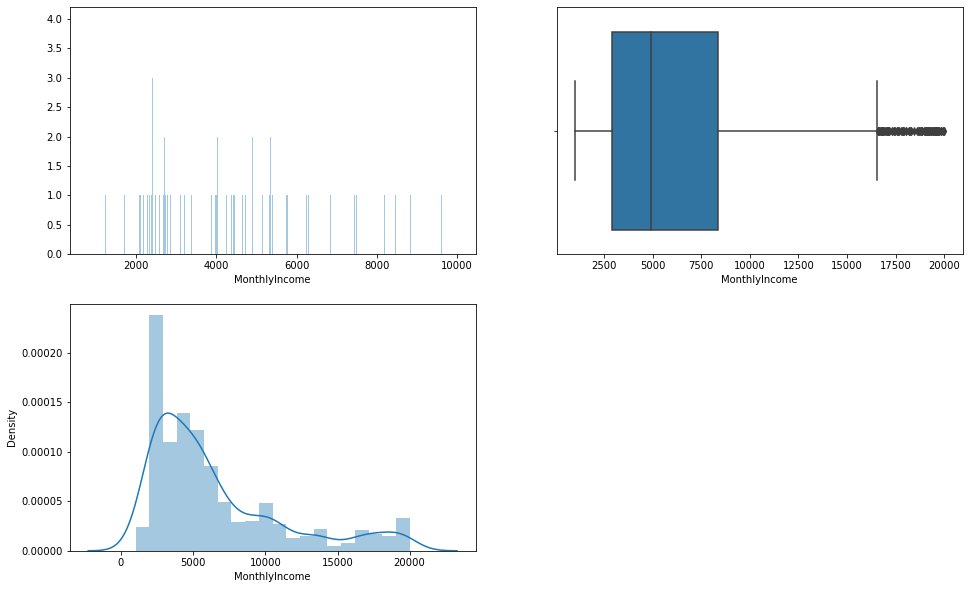

In [38]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['MonthlyIncome'], kde=False, bins=range(800, 10000, 1));
plt.subplot(2,2,2)
sns.boxplot(df['MonthlyIncome']);
plt.subplot(2,2,3)
sns.distplot(df['MonthlyIncome']);

We can see that there are outliers present in the boxplot and the distribution is not at all normal.

# MonthlyRate

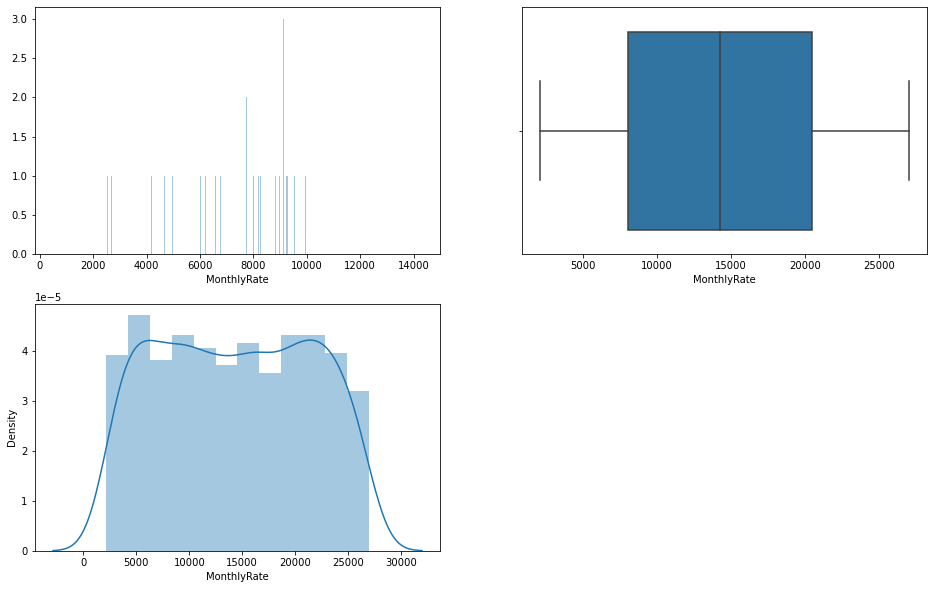

In [39]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['MonthlyRate'], kde=False, bins=range(500, 10000, 2));
plt.subplot(2,2,2)
sns.boxplot(df['MonthlyRate']);
plt.subplot(2,2,3)
sns.distplot(df['MonthlyRate']);

We can see that the boxplot has no outliers and the distribution curve is broad in the middle indicating to be almost normal

# NumCompaniesWorked

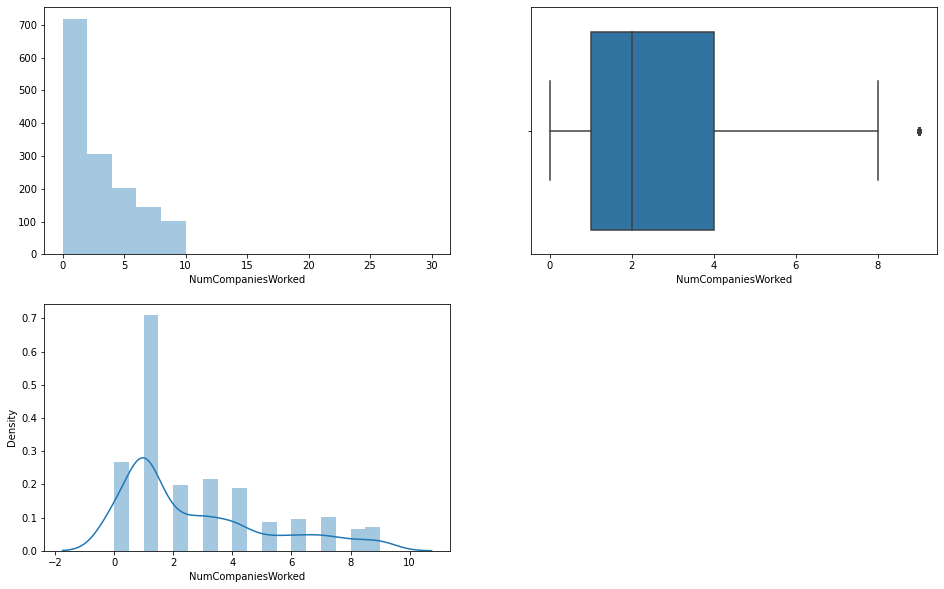

In [40]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['NumCompaniesWorked'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['NumCompaniesWorked']);
plt.subplot(2,2,3)
sns.distplot(df['NumCompaniesWorked']);

We can see that there is an outlier present which can be seen in boxplot but is very far from "max-quantile" point and so most probably our model will not be affected by it.

# OverTime

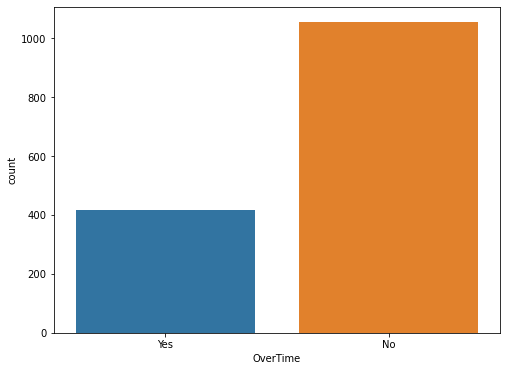

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(df.OverTime);

We can see that the "Category-No" is high when compared to "Yes"

# PercentSalaryHike

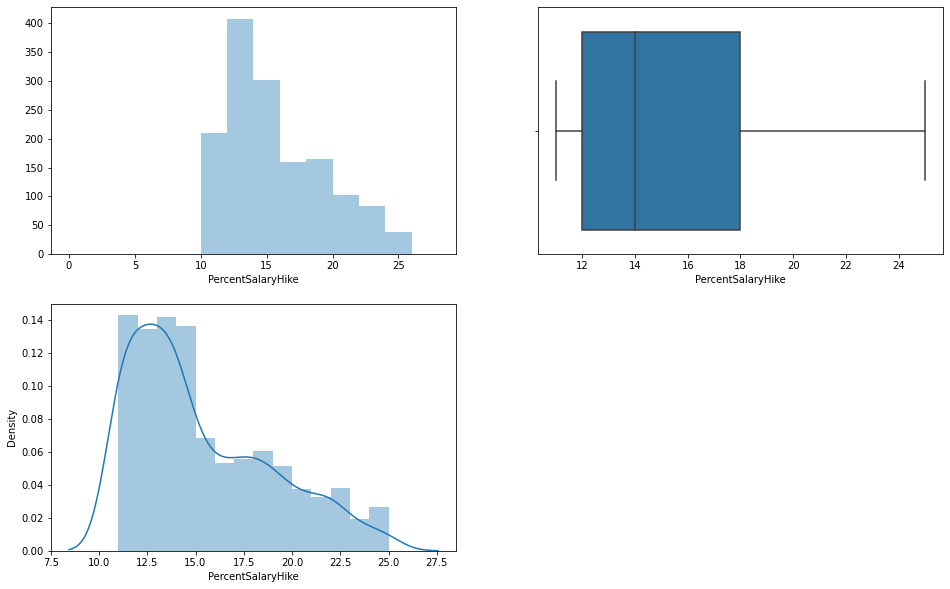

In [45]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['PercentSalaryHike'], kde=False, bins=range(0, 30, 2));
plt.subplot(2,2,2)
sns.boxplot(df['PercentSalaryHike']);
plt.subplot(2,2,3)
sns.distplot(df['PercentSalaryHike']);

We can see that the boxplot has no outliers and the distribution curve is skewed towards right and is not normal.

# PerformanceRating

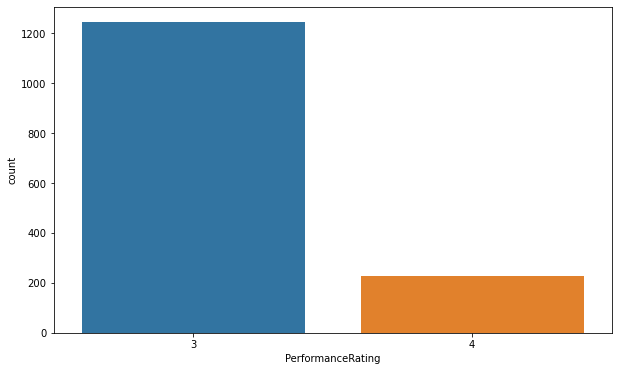

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df.PerformanceRating);

We can see that the more number of employees are with performance rating -3 and very few with performace rating-4

# RelationshipSatisfaction

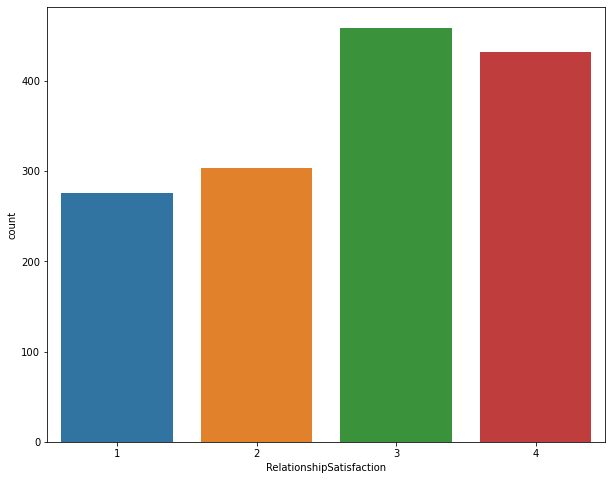

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(df.RelationshipSatisfaction);

We can see that the relationship satisfaction rate is high in category-3 and least in category-1.

# StockOptionLevel

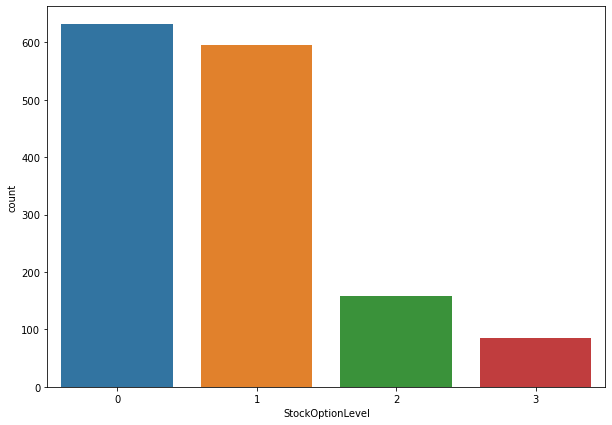

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(df.StockOptionLevel);

We can see that the level is more in category -0 and least in category-3

# TotalWorkingYears

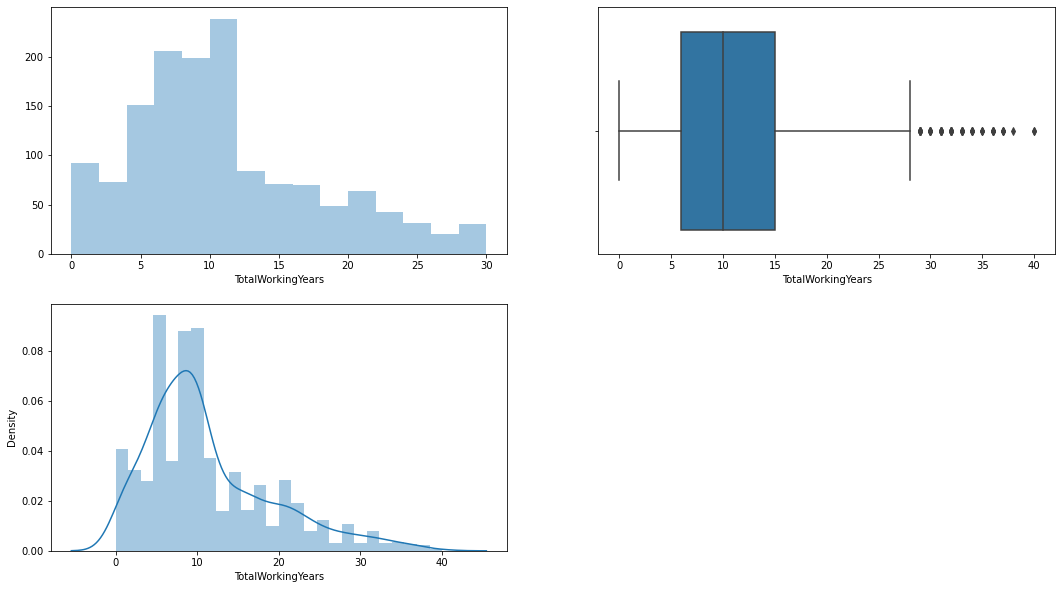

In [52]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(df['TotalWorkingYears'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['TotalWorkingYears']);
plt.subplot(2,2,3)
sns.distplot(df['TotalWorkingYears']);

We can see that there are outliers present in the boxplot at the max - quantile and the distribution is also skewed

# TrainingTimesLastYear

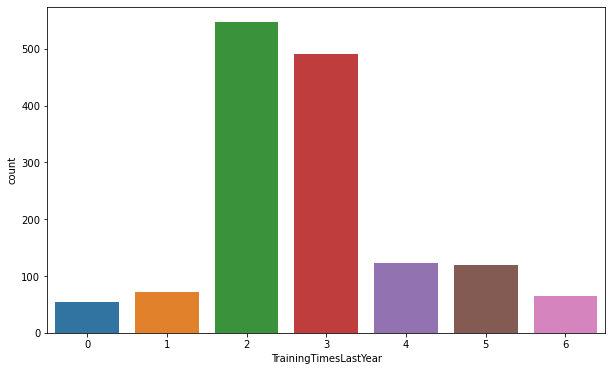

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(df.TrainingTimesLastYear);

We can see that there are more number of employees who got trained 2 times last year and there are few employees who did not get trained last year.

# Work Life Balance

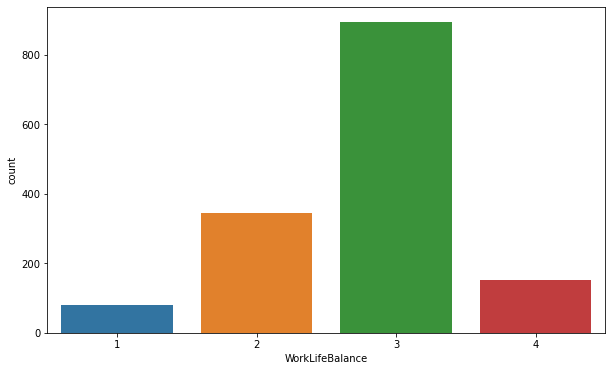

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(df.WorkLifeBalance);

We can see that there is more count in category -3 and least in category -1 for Worklifebalance

# Years At Company

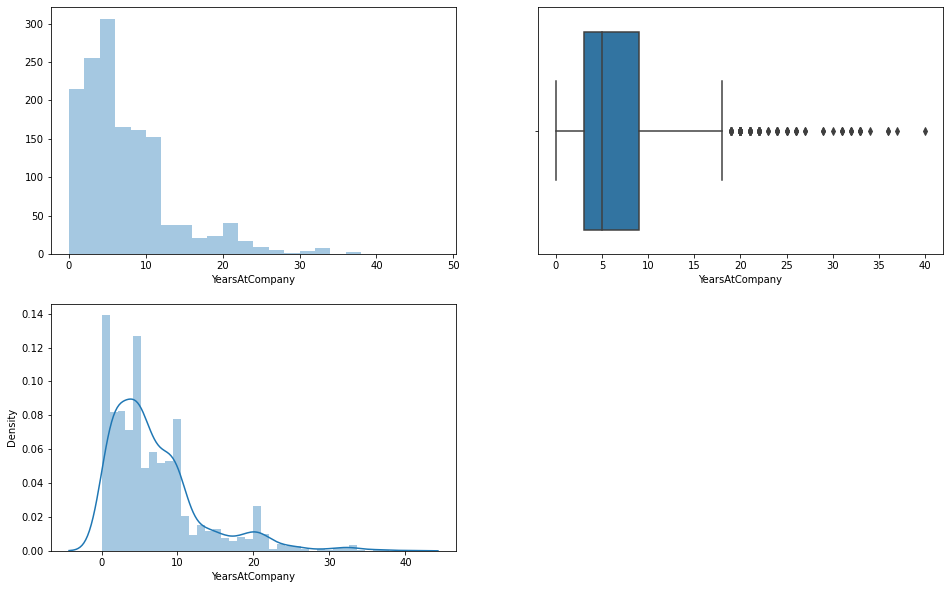

In [58]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['YearsAtCompany'], kde=False, bins=range(0, 50, 2));
plt.subplot(2,2,2)
sns.boxplot(df['YearsAtCompany']);
plt.subplot(2,2,3)
sns.distplot(df['YearsAtCompany']);

We can see that there are outliers present in the boxplot at the max - quantile and the distribution is also skewed.

# Years In Current Role

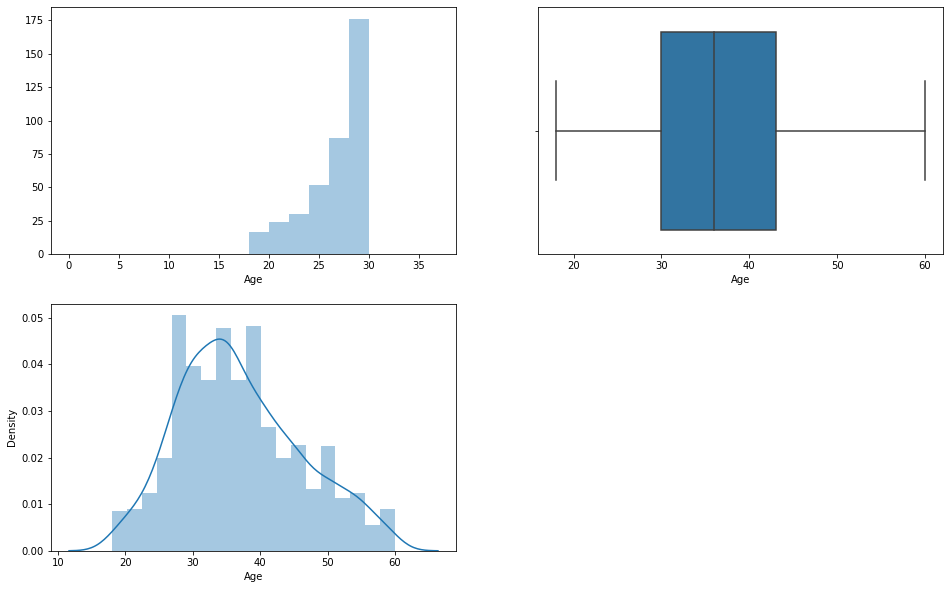

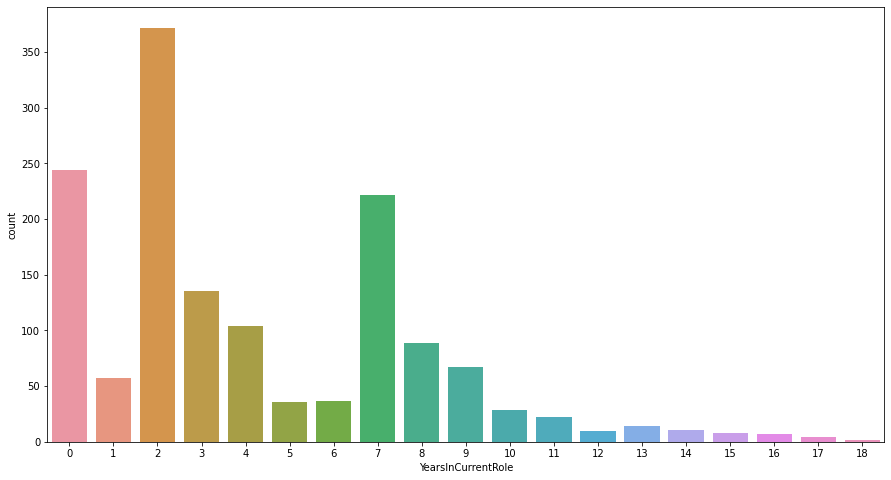

In [59]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['Age'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['Age']);
plt.subplot(2,2,3)
sns.distplot(df['Age']);
plt.figure(figsize=(15,8))
sns.countplot(df.YearsInCurrentRole);

We can see that there are no outliers present in the boxplot and the distribution curve seems to be normal and probably more number of employees are with 2 years of experience.

# YearsSinceLastPromotion

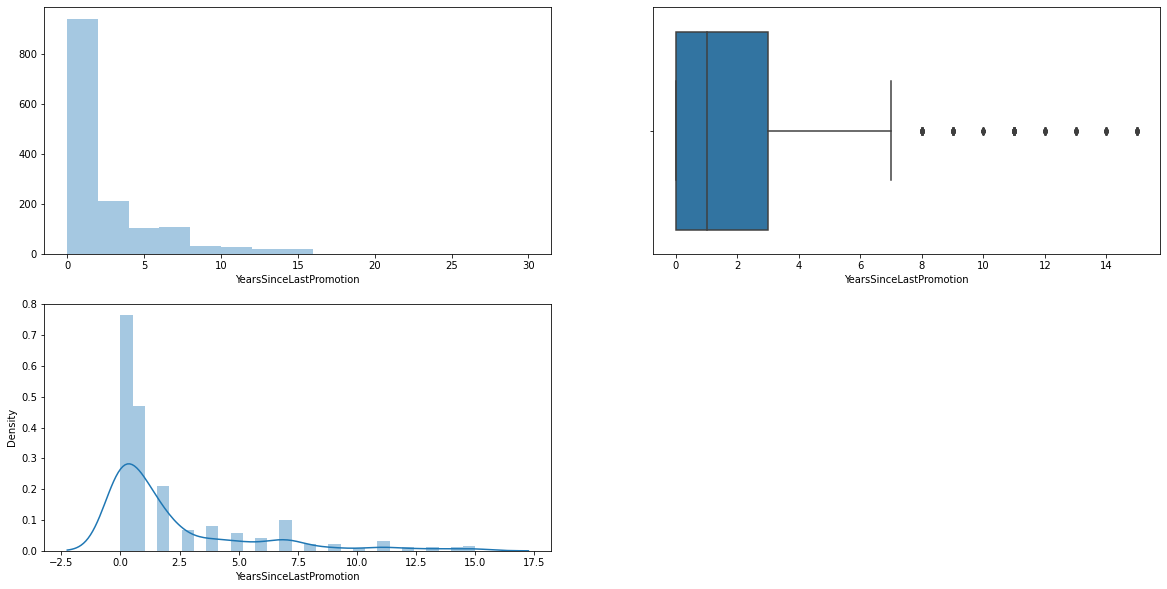

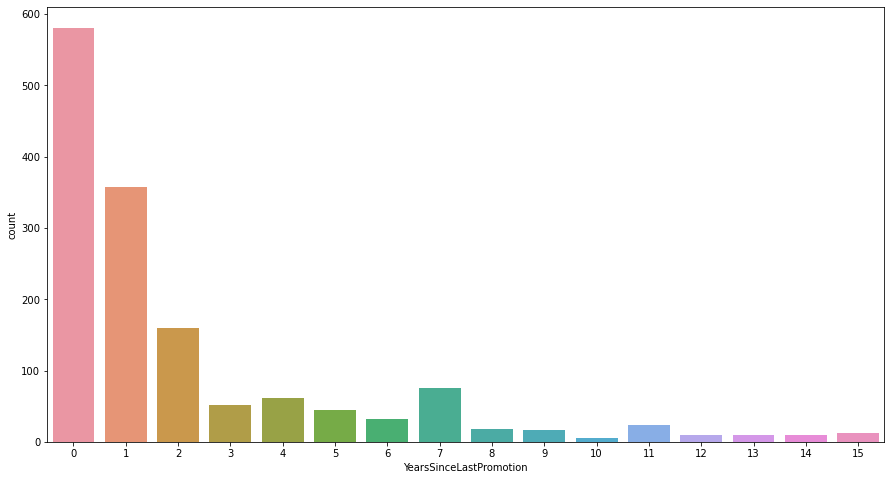

In [60]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['YearsSinceLastPromotion'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['YearsSinceLastPromotion']);
plt.subplot(2,2,3)
sns.distplot(df['YearsSinceLastPromotion']);
plt.figure(figsize=(15,8))
sns.countplot(df.YearsSinceLastPromotion);

We can see that there are outliers present in the boxplot and are far away from eachother and the distribution curve is not at all normal and there are more number of employees with no experience after getting promotion or recently promoted

# Years With Curr Manager

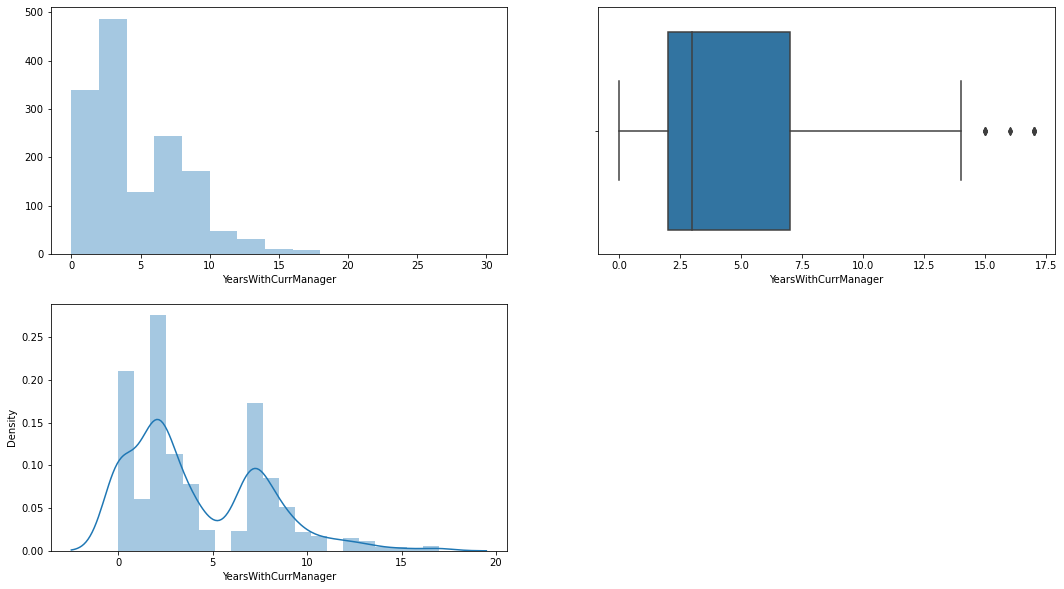

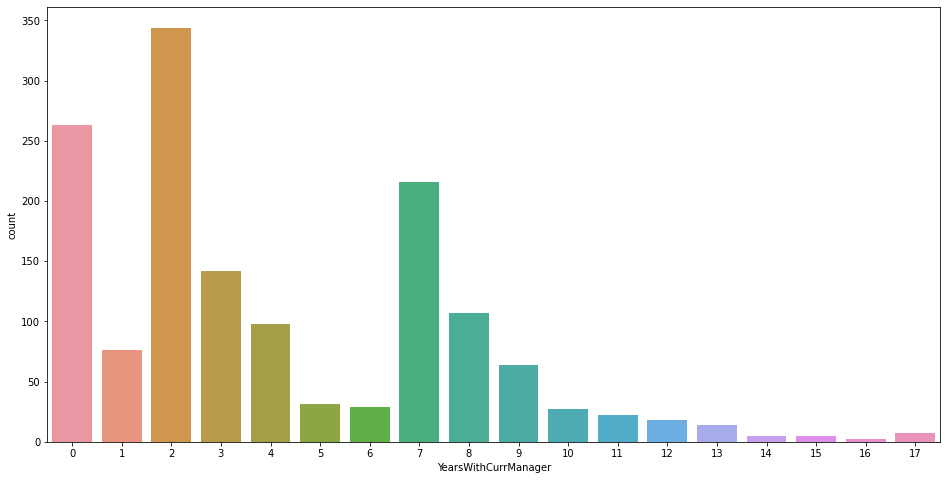

In [61]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(df['YearsWithCurrManager'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(df['YearsWithCurrManager']);
plt.subplot(2,2,3)
sns.distplot(df['YearsWithCurrManager']);
plt.figure(figsize=(16,8))
sns.countplot(df.YearsWithCurrManager);

We can see that thare are few outliers present in the boxplot and the distribution curve is with 2 peaks and is not at all normal and also we can see that there are more number of employees with 2 years of experience with the current manager.

# Correlation

<AxesSubplot:>

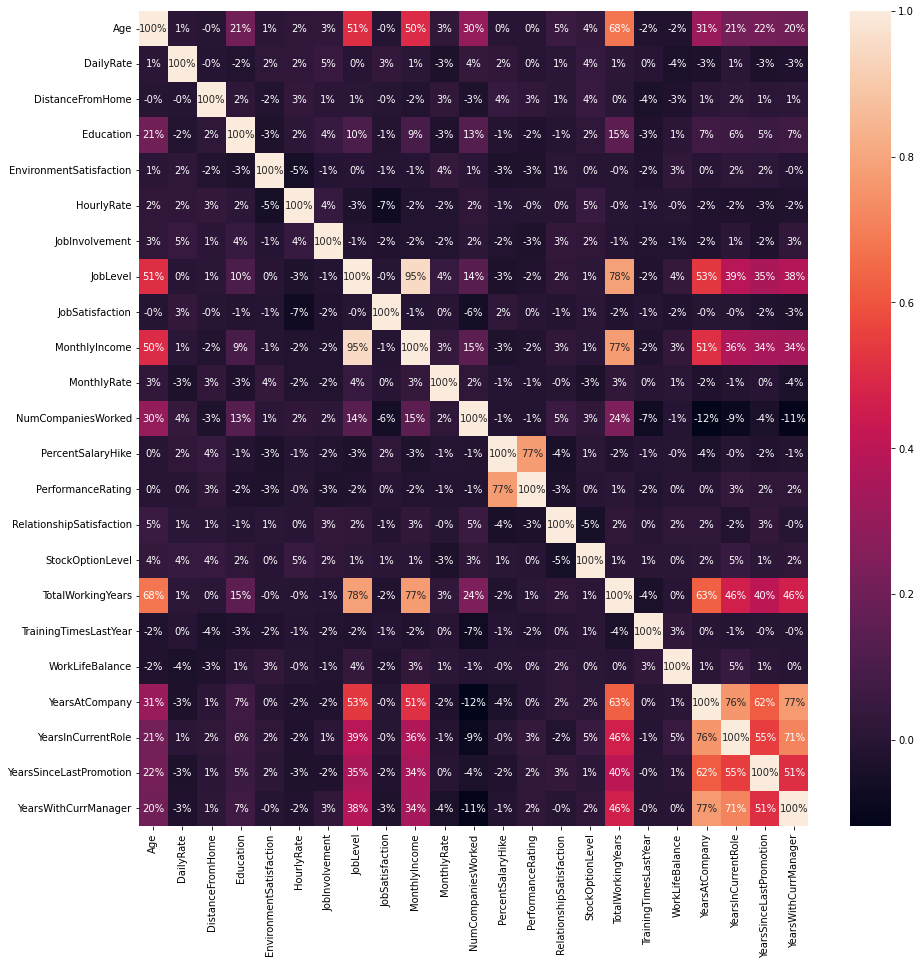

In [29]:
df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

Observation:

1) Here we can see that there are columns with high correlation or positive correlation with the other columns like: "Years at company" with "joblevel", "Monthly income" also "Years at company" with "Totalworking years","years at currentrole", "Years sice last promotion", "Years with current manager".

2) Here we can see that there are columns with positive correlation with the column "Years in current role" which is with "Years at Company","Years since last promotion","years with current manager".

3) Here we can see that there are columns with positive correlation with the column "years since last promotion" which is with "Years at company".

4) Also we can see that the highest of the positive correlation value is in the column "Monthly income" which is with "joblevel".

# Transforming the non-numerical columns into numerical

In [63]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


We can see that all the non-numerical columns are converted into numerical columns

# Outliers

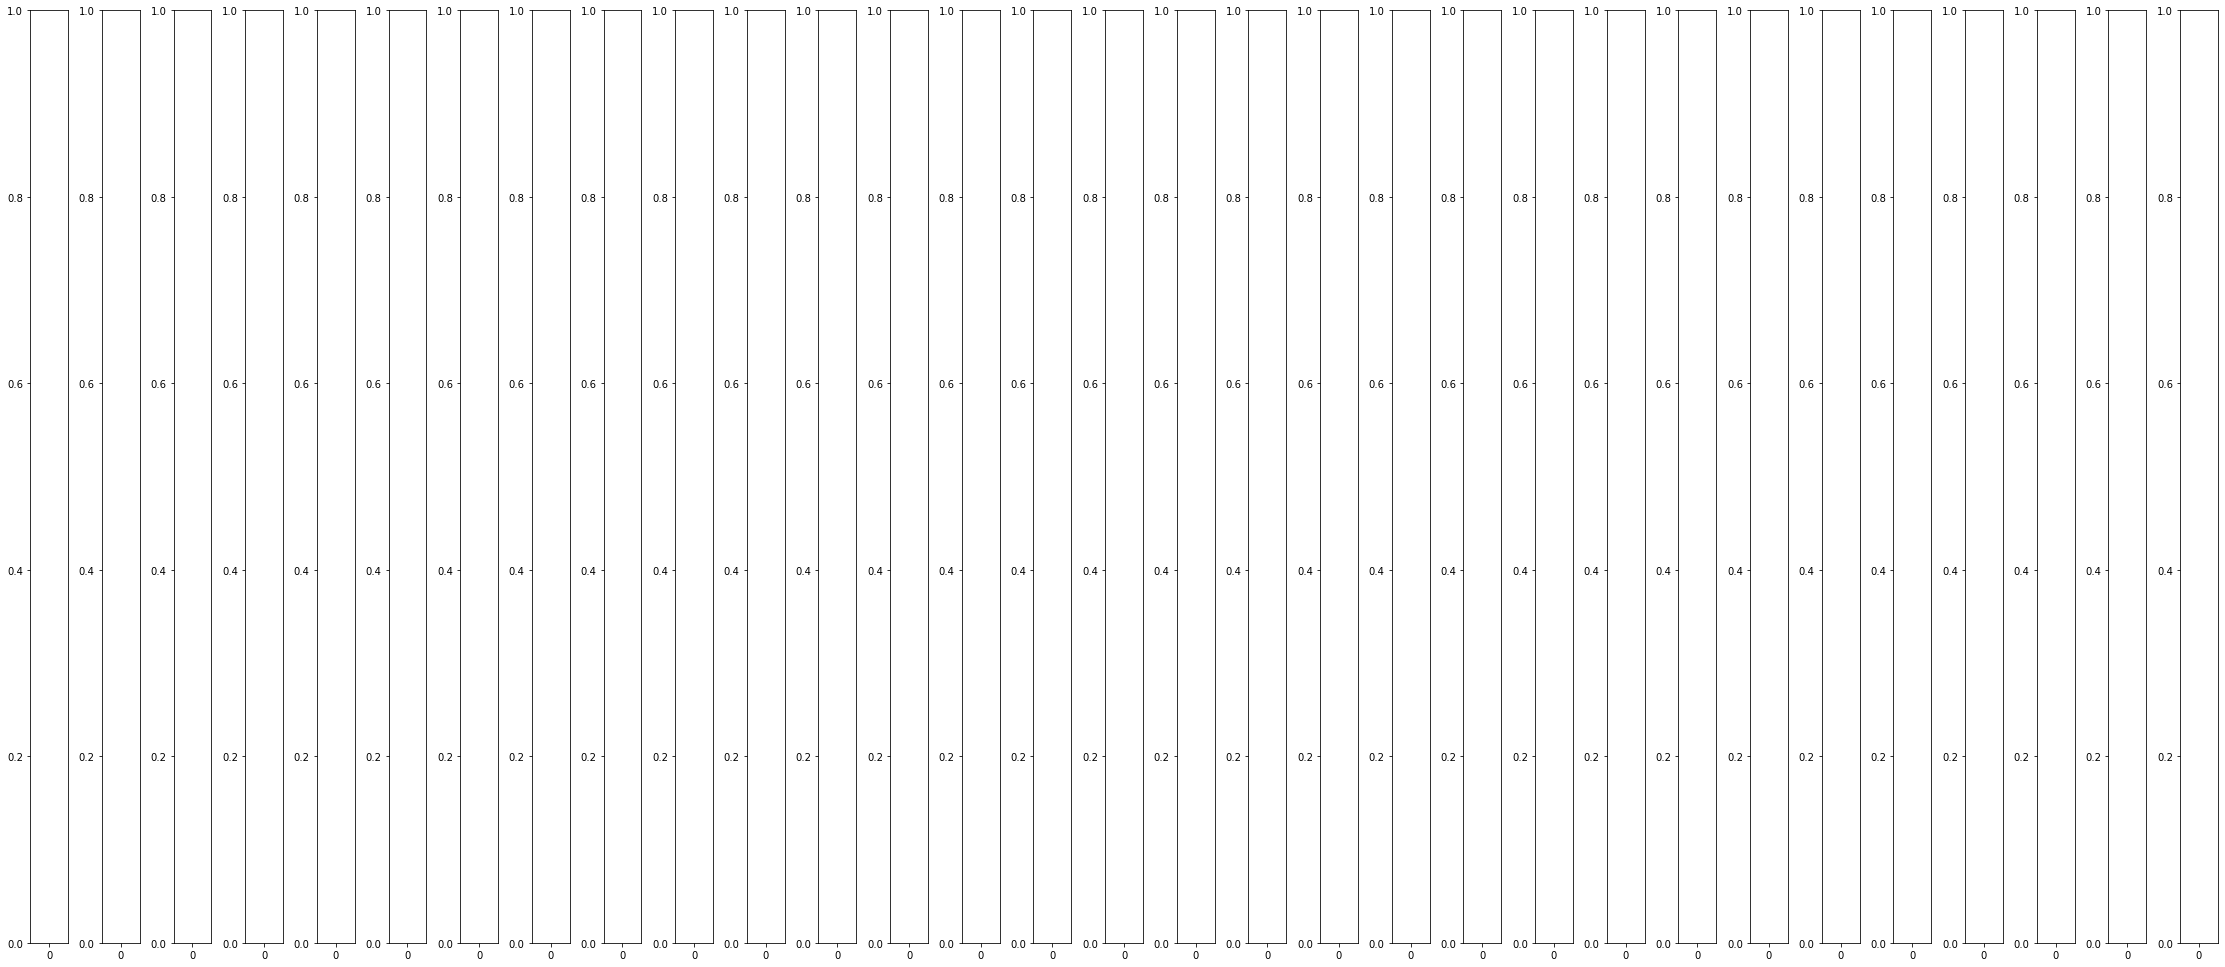

In [69]:
col_list = df.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df = df[col_list[i]],color = 'red', orient = 'v')
    plt.tight_layout()

Observations:

We can see that there are some columns with a lot of outliers present :-

1)"YearsAtCompany"

2) "MonthlyIncome"

3) "TotalWorkingYears"

4)"YearsSinceLastPromotion"

5)"YearsWithCurrManager".

# Removing Outliers - Using Z- Score method

In [72]:
z = np.abs(zscore(df))
z.shape

(1470, 31)

In [73]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [74]:
len(np.where(z>3))

2

In [75]:
# Way of displaying the outliers, in a numerical manner with a formula.
len(np.where(z>3)[0])

110

In [76]:
df_new = df[(z<3).all(axis = 1)] # 0= row wise, 1= columns wise
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


We can see that there is reduce in the number of total records(rows) and so it means there is reduction in the data.

# Loss Percentage Calculation

In [77]:
loss_percent = (1470-1387)/1470*100
print(loss_percent)

5.646258503401361


We can see that there is loss of 5.6% of the data , so it is negligible.

# Skewness

In [79]:
# -0.5 to +0.5 should be
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [80]:
features = ["YearsAtCompany","TotalWorkingYears","YearsSinceLastPromotion","YearsWithCurrManager"]

In [81]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [82]:
df_new[features] = scaler.fit_transform(df_new[features].values)
df_new[features]

,YearsAtCompany,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager
0,0.231837,-0.173231,-1.073534,0.582177
1,0.948319,0.147620,0.193168,1.018073
2,-2.156089,-0.351153,-1.073534,-1.528426
3,0.621429,-0.173231,1.027520,-1.528426
4,-0.933983,-0.544046,0.722874,-0.347871
...,...,...,...,...
1465,0.003289,1.039364,-1.073534,0.018680
1466,0.436162,-0.007630,0.193168,1.018073
1467,0.231837,-0.544046,-1.073534,0.018680
1468,0.791264,1.039364,-1.073534,1.205782


In [83]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

We can see that there is change or we can say that there is reduction in the skewness of the data

# Data Preprocessing

# Separating independent and the target variables

In [85]:
X = df_new.drop("Attrition", axis=1)
y = df_new["Attrition"]

In [87]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,...,0,0,0,-0.173231,0,0,0.231837,4,-1.073534,0.582177
1,31,1,113,1,7,0,1,2,1,31,...,1,3,1,0.147620,3,2,0.948319,7,0.193168,1.018073
2,19,2,805,1,1,1,4,3,1,62,...,0,1,0,-0.351153,3,2,-2.156089,0,-1.073534,-1.528426
3,15,1,820,1,2,3,1,3,0,26,...,0,2,0,-0.173231,3,2,0.621429,7,1.027520,-1.528426
4,9,2,312,1,1,0,3,0,1,10,...,0,3,1,-0.544046,3,2,-0.933983,2,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,...,0,2,1,1.039364,3,2,0.003289,2,-1.073534,0.018680
1466,21,2,327,1,5,0,3,3,1,12,...,0,0,1,-0.007630,5,2,0.436162,7,0.193168,1.018073
1467,9,2,39,1,3,2,1,1,1,57,...,1,1,1,-0.544046,0,2,0.231837,2,-1.073534,0.018680
1468,31,1,579,2,1,2,3,3,1,33,...,0,3,0,1.039364,3,1,0.791264,6,-1.073534,1.205782


In [88]:
X.shape

(1387, 30)

In [90]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [91]:
y.shape

(1387,)

# Scaling the X_data using standardscaler

In [92]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.705653,1.405373,-1.011249,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-0.929427,-0.173231,-2.171420,-2.501172,0.231837,0.040903,-1.073534,0.582177
1,1.442111,-0.905354,-1.312393,-0.496337,-0.145521,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.238250,0.147620,0.151871,0.336558,0.948319,0.965895,0.193168,1.018073
2,0.083966,0.593126,1.420460,-0.496337,-0.887573,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-0.929427,-0.351153,0.151871,0.336558,-2.156089,-1.192419,-1.073534,-1.528426
3,-0.368749,-0.905354,1.479698,-0.496337,-0.763898,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-0.929427,-0.173231,0.151871,0.336558,0.621429,0.965895,1.027520,-1.528426
4,-1.047821,0.593126,-0.526501,-0.496337,-0.887573,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.238250,-0.544046,0.151871,0.336558,-0.933983,-0.575758,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.192256,-0.496337,1.709609,-0.876177,0.556501,0.251978,0.813067,-1.225613,...,-0.424765,0.274084,0.238250,1.039364,0.151871,0.336558,0.003289,-0.575758,-1.073534,0.018680
1383,0.310324,0.593126,-0.467262,-0.496337,-0.392872,-1.853858,0.556501,1.169285,0.813067,-1.176286,...,-0.424765,-1.575817,0.238250,-0.007630,1.700732,0.336558,0.436162,0.965895,0.193168,1.018073
1384,-1.047821,0.593126,-1.604635,-0.496337,-0.640223,0.101504,-0.940815,-0.665328,0.813067,1.043387,...,2.354241,-0.650866,0.238250,-0.544046,-2.171420,0.336558,0.231837,-0.575758,-1.073534,0.018680
1385,1.442111,-0.905354,0.527938,1.405373,-0.887573,0.101504,0.556501,1.169285,0.813067,-0.140439,...,-0.424765,1.199034,-0.929427,1.039364,0.151871,-1.082307,0.791264,0.657565,-1.073534,1.205782


In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Training the model

In [94]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


I have used "forloop" for using models to train continously without getting interrupted

# Testing

In [95]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(X_test,y_test)*100))

LogisticRegression: 85.85%
K-Nearest Neighbors: 84.65%
Decision Tree: 77.46%
Random Forest: 86.81%
Gradient Boosting: 86.57%


# HyperParameter tuning

# GridSearchCV

In [96]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

# GradientBoostingClassifier

I have used "GradientBoostingClassifier" because this model has highest accuracy score when compared to the other models.

In [97]:
Gradient=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5) # 5 random value(80-85% they took 5,no particular reason)
Gradient.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 20]})

In [98]:
Gradient.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 20}

In [99]:
parameters = {'criterion': ['mse','mae'], 'max_features': ['auto', 'sqrt', 'log2']}

GradientBoosting = GradientBoostingClassifier()
Classifier = GridSearchCV(GradientBoosting,parameters)
Classifier.fit(X_train,y_train)

print(Classifier.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


We can see that the best_parameteers are selected

In [100]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'log2')
GradientBoosting.fit(X_train,y_train)
GradientBoosting.score(X_train,y_train)

pred_decision = GradientBoosting.predict(X_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,X,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 3.358334737906643
Cross Val Score: 87.16775316209126


We use max feature as log2 then, r square score is 8.6 and cv score is 86.2

In [101]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'sqrt')
GradientBoosting.fit(X_train,y_train)
GradientBoosting.score(X_train,y_train)

pred_decision = GradientBoosting.predict(X_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,X,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 6.872577111073674
Cross Val Score: 86.73402072565773


We have used sqrt as max feature and can see that r square score is less when compared to the log2 feature used.

# Saving The Model

In [102]:
filename = 'churn.pkl'
pickle.dump(GradientBoosting,open(filename, 'wb'))

In [103]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(X_test, y_test)
print(result)

0.8729016786570744


# Conclusion

In [104]:
Conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index = ["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
Predicted,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
